
# **Credit Card Approval Prediction**


---


### **Introduction:**

A bank's credit card department is one of the top adopters of data science. A top focus for the bank has always been acquiring new credit card customers. Giving out credit cards without doing proper research or evaluating applicants' creditworthiness is quite risky. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years, and the model is known as an application scorecard. A credit card application's cutoff value is determined using the application scorecard, which also aids in estimating the applicant's level of risk. This decision is made based on strategic priority at a given time.

Customers must fill out a form, either physically or online, to apply for a credit card. The application data is used to evaluate the applicant's creditworthiness. The decision is made using the application data in addition to the Credit Bureau Score, such as the FICO Score in the US or the CIBIL Score in India, and other internal information on the applicants. Additionally, the banks are rapidly taking a lot of outside data into account to enhance the caliber of credit judgements.

### **Q & A's:**
Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?--- Banks face major losses due to high NPA (Non Performing Assets) rates i.e overdue customer loans. Thus our model is usefull to predict whether the customer will be able to return the loan amount or not. This will help banks to lend Credit Cards to specific customers and reduce their losses.

How is it going to impact the banking sector?--- This Credit Card approval system will have a huge impact on the banking setor where only eligible customers will get Credit Card servies, reducing bank's NPA rates.

If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.---A bad quality of data or missing data can prove to be a problem for such models which can lead to lower accuracy and incorrect predictions, yet various other parameters for which customers aren't responsible can prove to be a potential gap between reality and model's predictions.

### **Initial Hypothesis:**
Prediction Hypothesis: We can predict credit card approval using applicant data and machine learning.

Benefits of Prediction: Prediction benefits include improved risk management, faster decisions, reduced defaults, and increased profitability.

Financial Strength Hypothesis: Higher income and stable employment favor credit card approval, indicating a stronger financial profile.

Contact Information: Contact details are collected but are not primary factors for approval; financial stability and credit history matter more.

Family Size & Marital Status Effect: Family size and marital status may influence credit card approval, especially for larger families and married individuals.

Housing & Property Ownership Hypothesis: Housing type and property ownership impact approval, favoring those with stable housing and property ownership.

### **Data Description**


| Variables | Values |
| --------- | ------ |
| Ind_ID | Client ID |
| Approval_status(Target Variable) | 0 is application approved and 1 is application rejected |
| Gender | Gender information |
| Car_owner | Having car or not |
| Propert_owner | Having property or not |
| Children | Count of children |
| Annual_income | Annual income |
| Type_Income | Income type |
| Education | Education level |
| Marital_status | Marital_status |
| Housing_type | Living style |
| Birthday_count | Use backward count from current day (0), -1 means yesterday |
| Employed_days | Start date of employment. Use backward count from current day (0).                                            Positive value means, individual is currently unemployed |
| Mobile_phone | Any mobile phone |
| Work_phone | Any work phone |
| Phone | Any phone number |
| EMAIL_ID | Any email ID |
| Type_Occupation | Occupation |
| Family_Members | Family size |

### **Importing Libraries**

In [ ]:
# Warning is used to supress the display of warnings
import warnings
warnings.filterwarnings("ignore")

# Numpy is used for Mathematical operations
import numpy as np

# Pandas is used for Data manipulaiton and analysis
import pandas as pd

# Matplotlib, Plotly and seaborn is used for visualization
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as po
import seaborn as sns

# To encode the variables
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Model Selection used for splitting the dataset into train and test
from sklearn.model_selection import train_test_split

# StandardScaler used to Standardize the all the variables
from sklearn.preprocessing import StandardScaler

# Scikit - Learn features various Models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV #Hyperparameter Tuning

In [ ]:
db1 = pd.read_csv("Credit_card.csv")
db2 = pd.read_csv("Credit_card_label.csv")

In [ ]:
db1.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [ ]:
db2.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [ ]:
#Merging Dataset
Credit_db = pd.merge(db1, db2, on='Ind_ID', how='outer')

In [ ]:
Credit_db.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
#Copying Data
Credit_card = Credit_db.copy()

In [ ]:
Credit_card.shape

(1548, 19)

In [ ]:
Credit_card.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
Credit_card.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
Credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

Within the dataset, there are a total of 11 numerical variables and 8 categorical variables. However, there are a few data type discrepancies, where:

 1. The "Birthday_count" variable should be integer, but it should be considered float.
 2. The "Employed_days" variable, which provides information about employment status, is currently classified as an integer. It might be more appropriate to convert it to a categorical data type, as it represents employed or unemployed categories.

Additionally, it's noted that the variables "Mobile_phone," "Work_Phone," "Phone," and "EMAIL_ID" are present in the dataset but are deemed unnecessary for the analysis.

In [ ]:
Credit_card.drop(columns=['Mobile_phone','Work_Phone','Phone','EMAIL_ID'], inplace=True, axis=1)

In [ ]:
Credit_card.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Type_Occupation',
       'Family_Members', 'label'],
      dtype='object')

It's noticeable that the variables within the dataset have inconsistent casing, with some in uppercase and others in proper case. To simplify data manipulation, it is good can convert all variables to lowercase

In [ ]:
credit = Credit_card.rename(columns = {'Ind_ID' : 'id','GENDER' : 'gender', 'Car_Owner': 'car_owner', 'Propert_Owner' : 'property_owner',
                        'CHILDREN' : 'children', 'Annual_income' : 'annual_income' , 'Type_Income' : 'type_income',
                        'EDUCATION': 'education', 'Marital_status' : 'marital_status','Housing_type': 'housing_type',
                        'Birthday_count' : 'age', 'Employed_days' : 'employed_status', 'Type_Occupation' : 'type_occupation' ,
                        'Family_Members' : 'family_size' , 'label' : 'approval_status'})

Now that all the variables are in lowercase, which enhances readability and ease of use, also made there specific variable name changes:

1. "Birthday_count" has been renamed to "age."
2. "Employed_days" has been renamed to "employed_status."
3. "Family_members" has been renamed to "family_size"

These changes have been implemented for better clarity and understanding of the dataset.

In [ ]:
Credit_card.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2,1


In [ ]:
credit.duplicated().sum()

0

The credit card dataset contains zero duplicate values

In [ ]:
credit.nunique() # To identify the number of unique values present in each variables

id                 1548
gender                2
car_owner             2
property_owner        2
children              6
annual_income       115
type_income           4
education             5
marital_status        5
housing_type          6
age                1270
employed_status     956
type_occupation      18
family_size           7
approval_status       2
dtype: int64

In [ ]:
credit.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,1548.0,NaN,NaN,NaN,5078920.351421,41717.587742,5008827.0,5045069.75,5078841.5,5115673.0,5150412.0
gender,1541,2,F,973,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_owner,1548,2,N,924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
property_owner,1548,2,Y,1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
children,1548.0,NaN,NaN,NaN,0.412791,0.776691,0.0,0.0,0.0,1.0,14.0
annual_income,1525.0,NaN,NaN,NaN,191399.32623,113252.997656,33750.0,121500.0,166500.0,225000.0,1575000.0
type_income,1548,4,Working,798,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,1548,5,Secondary / secondary special,1031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status,1548,5,Married,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing_type,1548,6,House / apartment,1380,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for column in credit.columns: # Creating a loop to view all the values present inside each variables
    unique_values = credit[column].unique()
    print(column)
    print(unique_values)
    print("-------------") #Creating space with '-' for easy understandable view

id
[5008827 5009744 5009746 ... 5115992 5118219 5053790]
-------------
gender
['M' 'F' nan]
-------------
car_owner
['Y' 'N']
-------------
property_owner
['Y' 'N']
-------------
children
[ 0  1  2  4  3 14]
-------------
annual_income
[ 180000.   315000.        nan  450000.    90000.   472500.   270000.
  126000.   202500.   157500.   112500.   540000.   292500.   135000.
   76500.   215100.   225000.    67500.   171000.   103500.    99000.
  391500.    65250.    72900.   360000.   256500.   675000.   247500.
   85500.   121500.   130500.   211500.    81000.    72000.   148500.
  162000.   195750.   585000.   216000.   306000.   108000.    63000.
   45000.   337500.   131400.   117000.   445500.   234000.  1575000.
  144000.    67050.    73350.   193500.   900000.    94500.   198000.
   54000.   166500.   167400.   153000.   423000.   243000.   283500.
  252000.   495000.   612000.    36000.   139500.   133650.   427500.
  261000.   231750.    90900.    45900.   119250.    58500.   32

From the  above information:
1. **Gender Column**:- Contains null values.
2. **Children & Family Member Variables**:- contains outlier need treatment or removal.
3. **Annual Income Column**:- Missing values and floating-point format need attention.
4. **Education Column**:- Simplify 'Secondary / secondary special' to 'Secondary education.'
5. **Marital Status Column**:- Simplify 'Civil marriage' and 'Single / not married' to 'Married' and 'Unmarried.'
6. **Birthday_count & Employed_days Variables**:- Inappropriate values; need to correct format and data type.

These concise points outline the issues and suggested actions for our dataset.

In [ ]:
for index, value in enumerate(credit['age']):
    if value < 0:
        age = round(value/365)*-1
        credit.at[index, 'age'] = age
print(credit['age'])

0       51.0
1       37.0
2        NaN
3       37.0
4       37.0
        ... 
1543    33.0
1544    28.0
1545    36.0
1546    42.0
1547    45.0
Name: age, Length: 1548, dtype: float64


Transforming all the entries in the "Birthday_count" column to represent ages.

In [ ]:
for index, value in enumerate(credit['employed_status']):
    if value < 0:
        work = round(value)*-1
        credit.at[index, 'employed_status'] = 'Employed'
    else:
        work = round(value)
        credit.at[index, 'employed_status'] = 'Unemployed'
print(credit['employed_status'])

0       Unemployed
1         Employed
2         Employed
3         Employed
4         Employed
           ...    
1543      Employed
1544      Employed
1545      Employed
1546      Employed
1547      Employed
Name: employed_status, Length: 1548, dtype: object


Updating all values in the "Employed_days" column to indicate whether the customer is employed or unemployed.

In [ ]:
for index, value in enumerate(credit['education']):
    if value == 'Secondary / secondary special' :
        credit.at[index, 'education'] = 'Secondary education'
print(credit['education'])

0          Higher education
1          Higher education
2          Higher education
3          Higher education
4          Higher education
               ...         
1543       Higher education
1544      Incomplete higher
1545       Higher education
1546    Secondary education
1547       Higher education
Name: education, Length: 1548, dtype: object


Modifying the values in the education column, specifically changing "Secondary / secondary special" to "Secondary education."

In [ ]:
for index, value in enumerate(credit['marital_status']):
    if value == 'Civil marriage' :
        credit.at[index, 'marital_status'] = 'Married'
    elif value == 'Single / not married' :
        credit.at[index, 'marital_status'] = 'Unmarried'
print(credit['marital_status'])

0         Married
1         Married
2         Married
3         Married
4         Married
          ...    
1543      Married
1544    Unmarried
1545      Married
1546      Married
1547      Married
Name: marital_status, Length: 1548, dtype: object


Modifying the values in the marital status column, specifically changing "Civil marriage" to "Married" and "Single / not married" to "Unmarried"

##**Feature Engineering**

Dealing With Missing Values

In [ ]:
#Before dealing with missing values lets check the total missing values of each variables
credit.isnull().sum()

id                   0
gender               7
car_owner            0
property_owner       0
children             0
annual_income       23
type_income          0
education            0
marital_status       0
housing_type         0
age                 22
employed_status      0
type_occupation    488
family_size          0
approval_status      0
dtype: int64

In [ ]:
credit = credit.dropna(subset ='gender')

We have dropped all the Null values from gender column.

In [ ]:
credit['age'].fillna(credit['age'].median(), inplace = True)

We have filled all the Null values in 'age' column with its median value.

In [ ]:
credit['age'] =credit['age'].astype(int)

In [ ]:
#Fill missing values in 'annual_income' column with the mean and round the values
credit['annual_income'] = credit['annual_income'].fillna(credit['annual_income'].mean()).round()

We have filled all the Null values in the 'annual_income' column with its mean value.

In [ ]:
# Calculate the percentage of missing values in 'type_occupation' column
missing_percentage = (credit['type_occupation'].isnull().sum() / len(credit)) * 100

print(f"Percentage of missing values in 'type_occupation': {missing_percentage:.2f}%")

Percentage of missing values in 'type_occupation': 31.54%


In [ ]:
credit.drop(columns = 'type_occupation', inplace = True)

Given that the "Type of occupation" column has missing values exceeding 32%, it's a reasonable choice to consider removing this column from the dataset. Imputing missing values with "Others" could introduce bias and potentially affect the quality of predictions, so removing it is a valid decision. This action should help streamline the dataset for more accurate analysis or predictions.

In [ ]:
credit.isnull().sum()

id                 0
gender             0
car_owner          0
property_owner     0
children           0
annual_income      0
type_income        0
education          0
marital_status     0
housing_type       0
age                0
employed_status    0
family_size        0
approval_status    0
dtype: int64

The dataset is now devoid of any missing values.



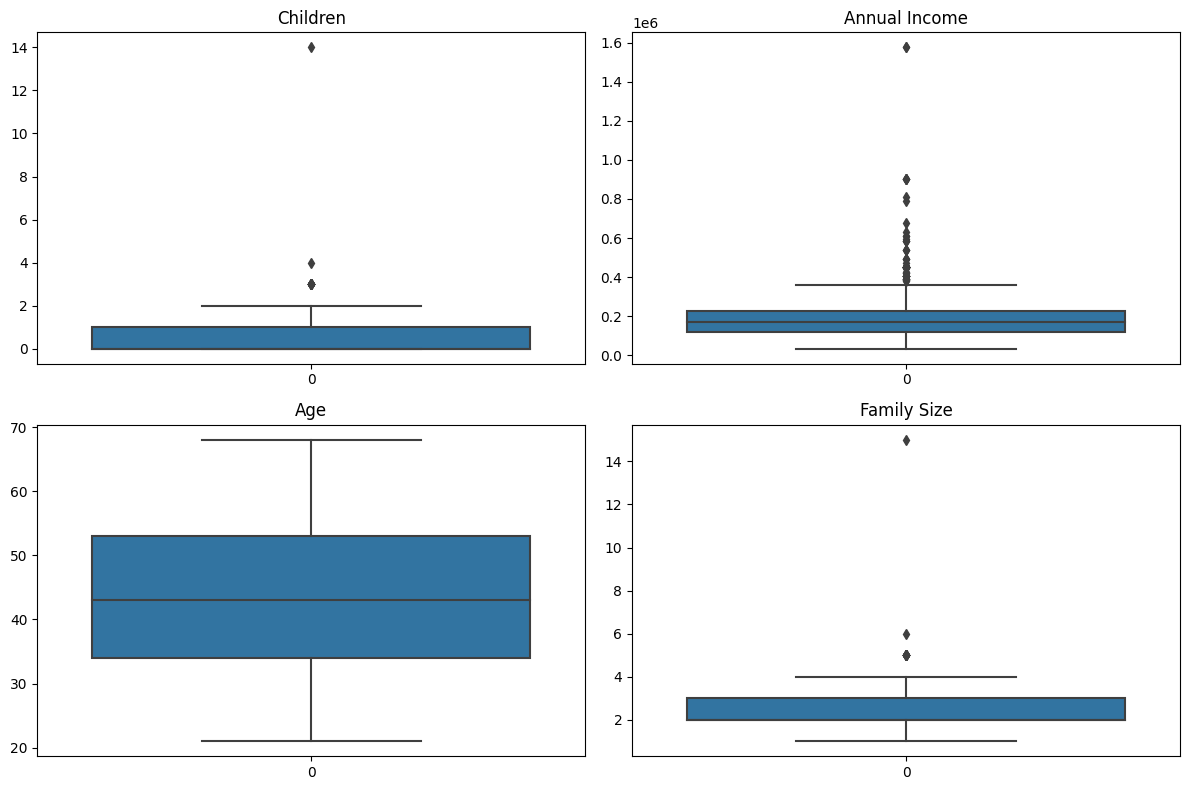

In [ ]:
#Checking for all the outliers for continious variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

#Boxplot for 'children'
sns.boxplot(data=credit['children'], ax=axes[0, 0])
axes[0, 0].set_title('Children')

#Boxplot for 'annual_income'
sns.boxplot(data=credit['annual_income'], ax=axes[0, 1])
axes[0, 1].set_title('Annual Income')

#Boxplot for 'age'
sns.boxplot(data=credit['age'], ax=axes[1, 0])
axes[1, 0].set_title('Age')

#Boxplot for 'family_members'
sns.boxplot(data=credit['family_size'], ax=axes[1, 1])
axes[1, 1].set_title('Family Size')

plt.tight_layout()
plt.show()

From the information provided, it's evident that the "Children," "Family," and "Annual Income" columns contain outliers, whereas the "Age" column does not exhibit any outliers.

In [ ]:
#Dealing with outlier for 'children'
Q1 = np.percentile(credit['children'], 25, interpolation='midpoint')
Q3 = np.percentile(credit['children'], 75, interpolation='midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
credit['children'] = credit['children'].clip(lower=0, upper=2)

#Dealing with outlier for 'family_members'
Q1 = np.percentile(credit['family_size'], 25, interpolation='midpoint')
Q3 = np.percentile(credit['family_size'], 75, interpolation='midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
credit['family_size'] = credit['family_size'].clip(lower=0, upper=4)

#Dealing with outlier for 'annual_income'
Q1 = np.percentile(credit['annual_income'], 25, interpolation='midpoint')
Q3 = np.percentile(credit['annual_income'], 75, interpolation='midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
credit['annual_income'] = np.where(
    (credit['annual_income'] < low_lim) | (credit['annual_income'] > up_lim),
    up_lim,
    credit['annual_income'])
credit['annual_income'] = credit['annual_income'].astype(int)

I have removed all outliers from the "Children," "Family Size," and "Annual Income" columns in your dataset. This action can help ensure that your data is more representative and suitable for analysis or modeling.

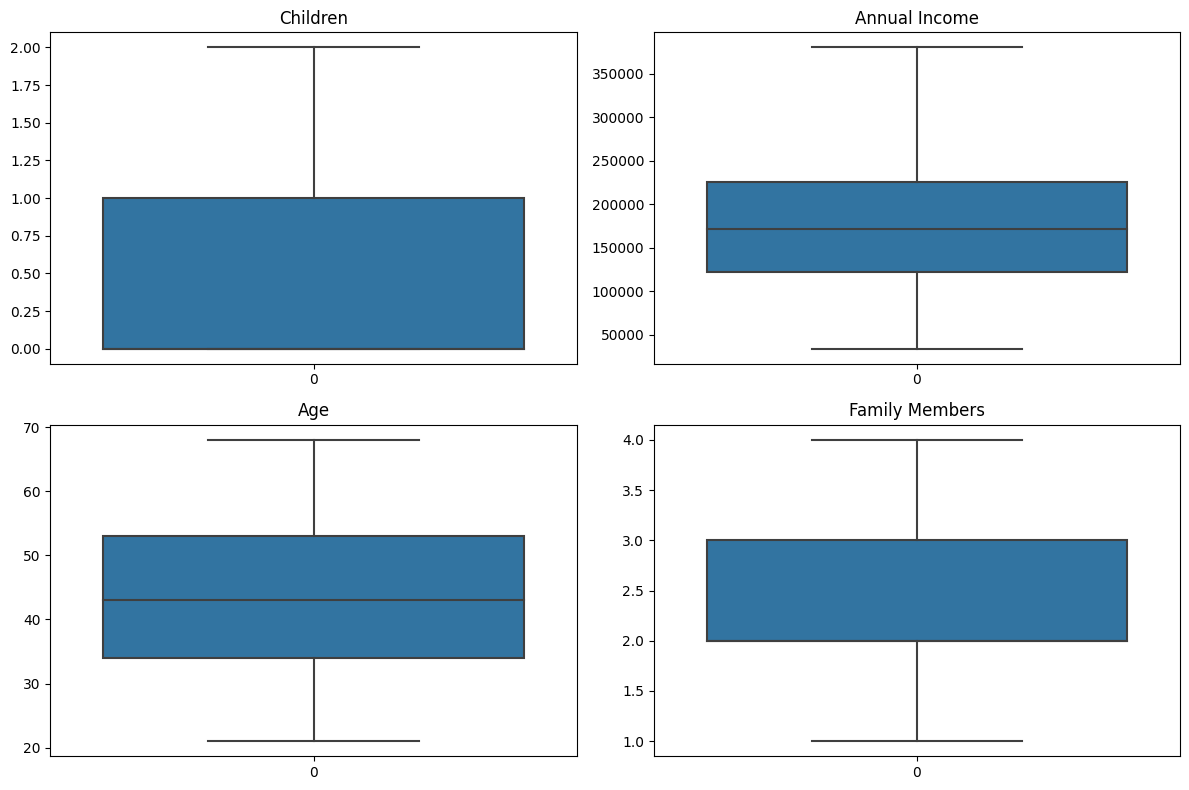

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

#Boxplot for 'children'
sns.boxplot(data=credit['children'], ax=axes[0, 0])
axes[0, 0].set_title('Children')

#Boxplot for 'annual_income'
sns.boxplot(data=credit['annual_income'], ax=axes[0, 1])
axes[0, 1].set_title('Annual Income')

#Boxplot for 'age'
sns.boxplot(data=credit['age'], ax=axes[1, 0])
axes[1, 0].set_title('Age')

#Boxplot for 'family_members'
sns.boxplot(data=credit['family_size'], ax=axes[1, 1])
axes[1, 1].set_title('Family Members')

plt.tight_layout()
plt.show()

In this context, it's evident that all outliers have been successfully eliminated. Consequently, the dataset is now in a pristine condition, ready for analysis.

In [ ]:
credit.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,1541.0,NaN,NaN,NaN,5078979.253731,41671.365842,5008827.0,5045113.0,5078924.0,5115671.0,5150412.0
gender,1541,2,F,973,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_owner,1541,2,N,922,NaN,NaN,NaN,NaN,NaN,NaN,NaN
property_owner,1541,2,Y,1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
children,1541.0,NaN,NaN,NaN,0.3939,0.66053,0.0,0.0,0.0,1.0,2.0
annual_income,1541.0,NaN,NaN,NaN,183994.19403,81875.423408,33750.0,121500.0,171000.0,225000.0,380250.0
type_income,1541,4,Working,795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,1541,5,Secondary education,1029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status,1541,4,Married,1145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing_type,1541,6,House / apartment,1374,NaN,NaN,NaN,NaN,NaN,NaN,NaN


At this point, we can confidently grasp all the pertinent information with precision and clarity.

In [ ]:
from google.colab import files
credit.to_csv('credit_card_cleaned.csv', index=False)

Exporting the cleaned dataset into csv format for further analysis on MySQL

In [ ]:
df = credit['approval_status'].replace({0 : 'Approved', 1 : 'Not Approved'}).value_counts()
print("Approval Status Total Counts:")
print(df)

# Visualizing the total approved and not approved applicants

approval_labels = credit['approval_status'].value_counts().keys().tolist()
approval_values = credit['approval_status'].value_counts().values.tolist()
custom_legends = ['Approved', 'Not-Approved']  # Custom legends for 0 and 1
plot_data = [go.Pie(labels=approval_labels,
                    values=approval_values,
                    marker=dict(colors=['lightblue','orange'], line=dict(color="black",width=1.5)),
                    rotation=90,
                    hoverinfo="label+value+text",
                    hole= 0.5,
                    text= custom_legends)]

fig = go.Figure(data=plot_data)
po.iplot(fig)

Approval Status Total Counts:
Approved        1371
Not Approved     170
Name: approval_status, dtype: int64


It is evident from the dataset that approximately 89% of the candidates who applied for the credit card were granted approval, while the remaining 11% did not receive approval.

-------------------------------
Age and approval Status:
          Not Approved  Approved  Total
age                                    
(20, 30]           203        22    225
(30, 40]           388        41    429
(40, 50]           361        45    406
(50, 60]           294        42    336
(60, 70]           125        20    145
All               1371       170   1541
-------------------------------



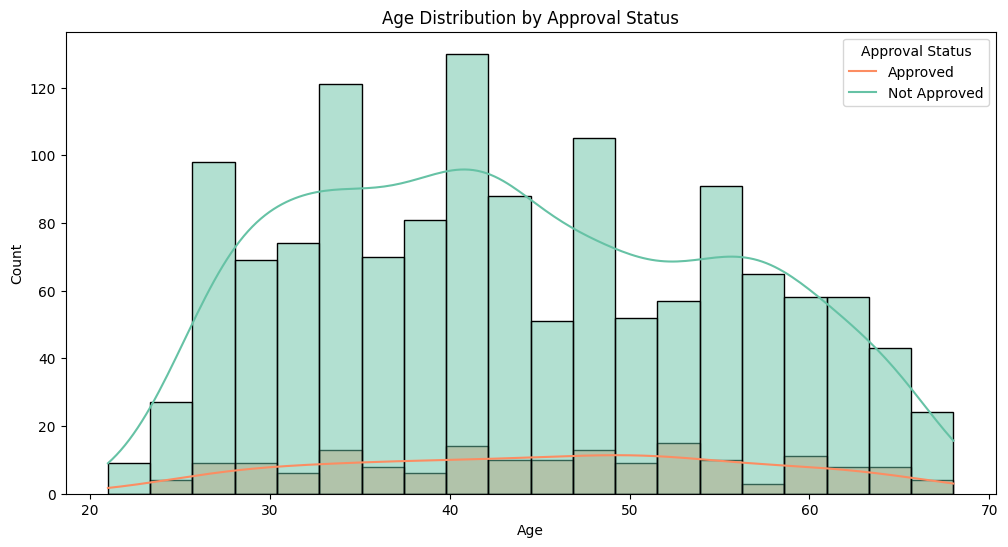

In [ ]:
# Visualizing the age distribution

bin_age = credit['age']
bin_edge = [20, 30, 40, 50, 60, 70]
bin_age = pd.cut(credit['age'], bins = bin_edge)
age_approval = pd.crosstab(bin_age, credit['approval_status'], margins=True)
age_approval.columns = ['Not Approved', 'Approved', 'Total']
print("-------------------------------")
print("Age and approval Status:")
print(age_approval)
print("-------------------------------\n")

plt.figure(figsize=(12, 6))
sns.histplot(data=credit, x='age', bins=20, kde=True, hue='approval_status', palette='Set2')
plt.title('Age Distribution by Approval Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Approval Status', labels=['Approved', 'Not Approved'])
plt.show()

In our analysis, a significant number of credit card applicants fall within the age range of 30 to 60. The visual representations provide a comprehensive view of credit card approval patterns across various age groups.

In [ ]:
# Permanently binning the age
bin_edges = [20, 30, 40, 50, 60, 70]
credit['age'] = pd.cut(credit['age'], bins=bin_edges)

-------------------------------
Employed status and approval Status:
approval_status     0    1   All
employed_status                 
Employed         1145  136  1281
Unemployed        226   34   260
All              1371  170  1541
-------------------------------



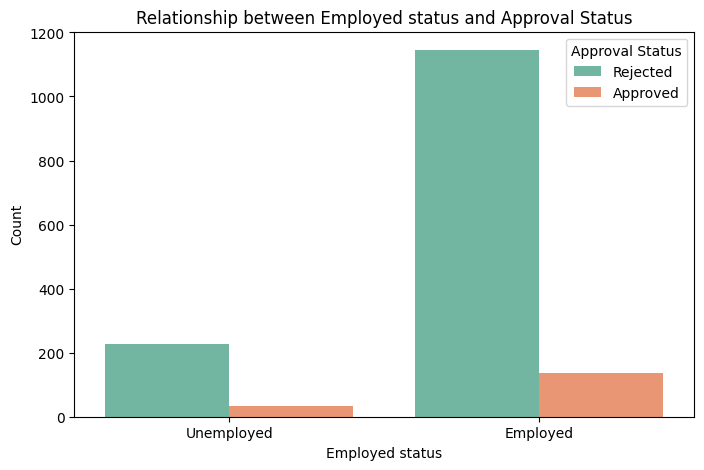

In [ ]:
# Visualizing the employment status with respect to approval status

employed_approval = pd.crosstab(credit['employed_status'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Employed status and approval Status:")
print(employed_approval)
print("-------------------------------\n")
plt.figure(figsize=(8,5))
sns.countplot(data=credit, x='employed_status',  hue='approval_status', palette='Set2')
plt.title("Relationship between Employed status and Approval Status")
plt.xlabel("Employed status")
plt.ylabel("Count")
plt.legend(title='Approval Status', labels=['Rejected', 'Approved'])
plt.xticks(rotation=0)
plt.show()

The analysis strongly confirms that employed applicants have the highest credit card approval rate, in line with the initial hypothesis. Surprisingly, some unemployed applicants with other income sources like pensioners or self employed also received approvals.

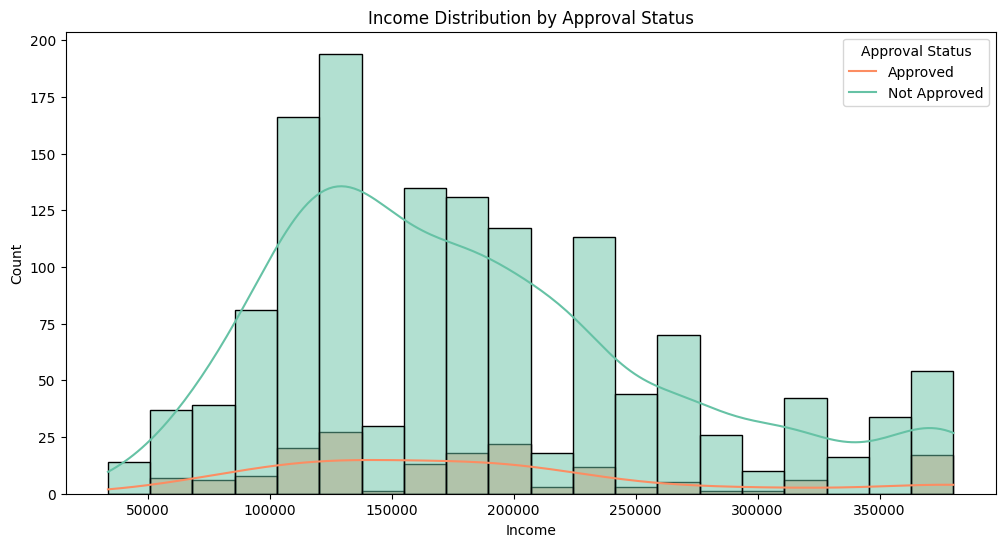

In [ ]:
# Visualizing the income distribution

plt.figure(figsize=(12, 6))
sns.histplot(data=credit, x='annual_income', bins=20, kde=True, hue='approval_status', palette='Set2')
plt.title('Income Distribution by Approval Status')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend(title='Approval Status', labels=['Approved', 'Not Approved'])
plt.show()

The dataset analysis indicates that applicants earning over 1 Lakh are more likely to get credit card approvals, aligning with our hypothesis. However, the lack of currency information for earnings should be acknowledged.

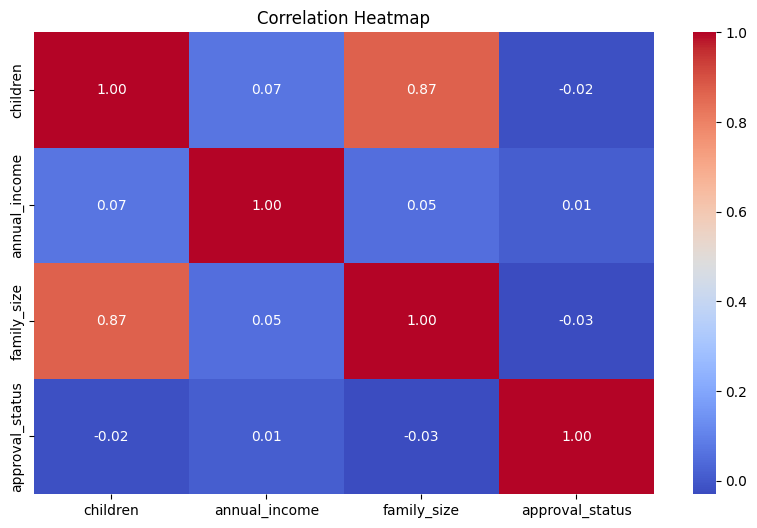

In [ ]:
# Creating Heatmap to Visualize the relationship

correlation_columns = ['children', 'annual_income', 'family_size', 'approval_status']
correlation_df = credit[correlation_columns]
correlation_matrix = correlation_df.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

It's evident that there is a strong correlation between the number of children and family size.

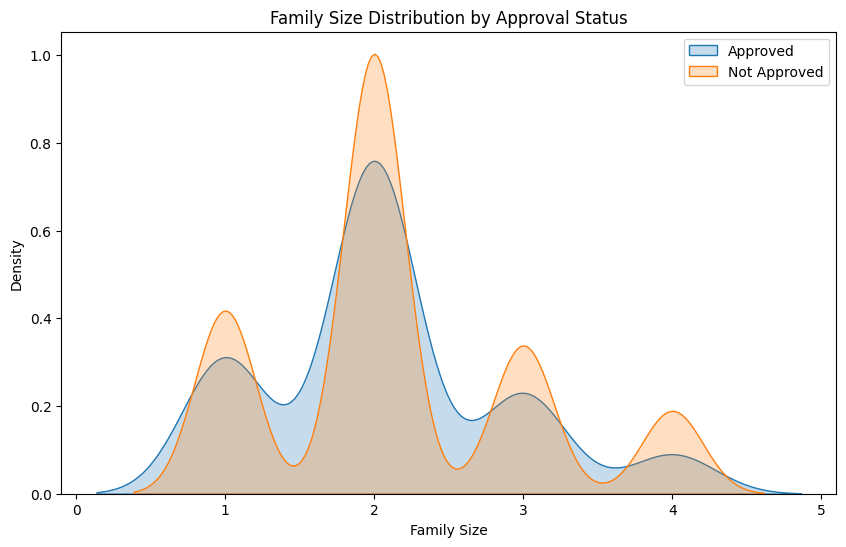

In [ ]:
# Visualizing the Family size distribution by approval status

approved_family_size = credit[credit['approval_status'] == 1]['family_size']
not_approved_family_size = credit[credit['approval_status'] == 0]['family_size']
plt.figure(figsize=(10, 6))
sns.kdeplot(approved_family_size, label='Approved', shade=True)
sns.kdeplot(not_approved_family_size, label='Not Approved', shade=True)
plt.title('Family Size Distribution by Approval Status')
plt.xlabel('Family Size')
plt.ylabel('Density')
plt.legend()
plt.show()

The data reveals a significant presence of approved credit card applicants with a family size of 2, often indicating married couples without children.This aligns with my hypothesis that family size can influence credit card approval; larger families may have distinct spending patterns due to higher expenses.

-------------------------------
Children and approval Status:
approval_status     0    1   All
children                        
0                 964  122  1086
1                 268   35   303
2                 139   13   152
All              1371  170  1541
-------------------------------



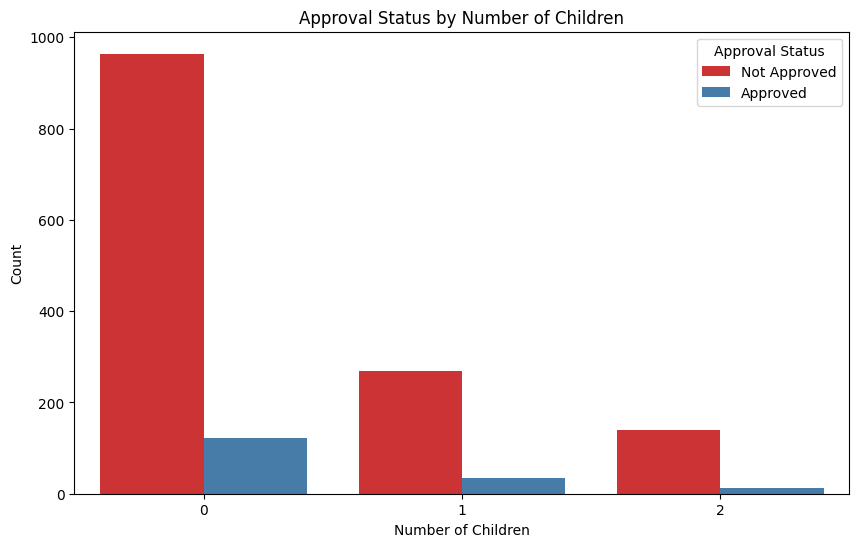

In [ ]:
# Visualizing relationship between Children and Approval Status
children_approval = pd.crosstab(credit['children'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Children and approval Status:")
print(children_approval)
print("-------------------------------\n")
plt.figure(figsize=(10, 6))
sns.countplot(x='children', hue='approval_status', data=credit, palette='Set1')
plt.title('Approval Status by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.legend(title='Approval Status', labels=['Not Approved', 'Approved'])
plt.show()

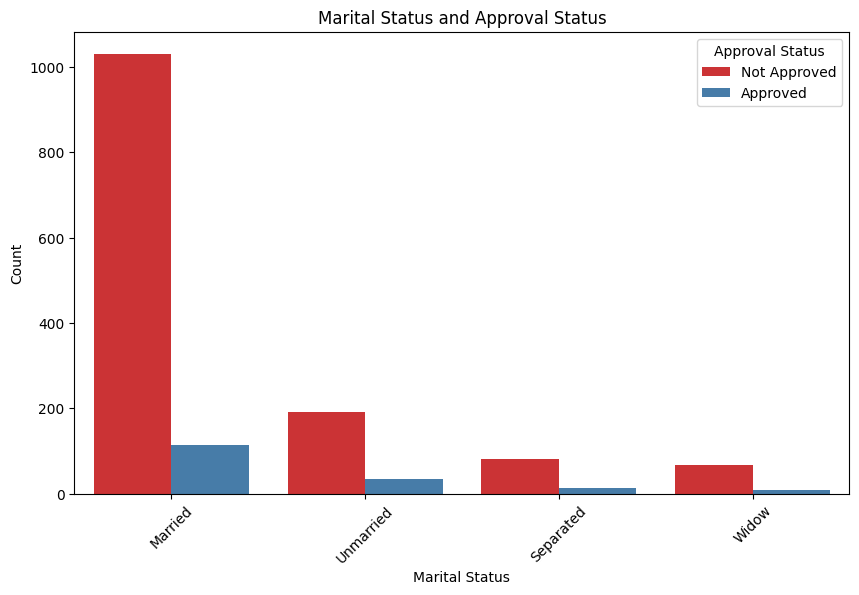

In [ ]:
# Visualizing relationship between Marital Status and Approval Status

plt.figure(figsize=(10, 6))
sns.countplot(x='marital_status', hue='approval_status', data=credit, palette='Set1')
plt.title('Marital Status and Approval Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Approval Status', labels=['Not Approved', 'Approved'])
plt.xticks(rotation=45)
plt.show()

A family size of 2 members indicates a married couple without children. Furthermore, the data indicates that a larger proportion of married individuals have received credit card approvals. This observation aligns with your initial assumption.

-------------------------------
Car Owners and approval Status:
approval_status     0    1   All
car_owner                       
N                 816  106   922
Y                 555   64   619
All              1371  170  1541
-------------------------------



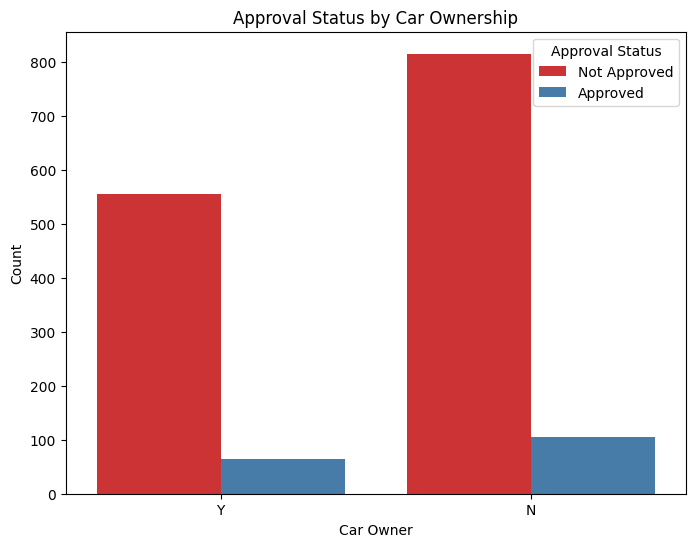

In [ ]:
# Visualizing relationship between Car Owners and Approval Status

car_approval = pd.crosstab(credit['car_owner'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Car Owners and approval Status:")
print(car_approval)
print("-------------------------------\n")
plt.figure(figsize=(8, 6))
sns.countplot(x='car_owner', hue='approval_status', data=credit, palette='Set1')
plt.title('Approval Status by Car Ownership')
plt.xlabel('Car Owner')
plt.ylabel('Count')
plt.legend(title='Approval Status', labels=['Not Approved', 'Approved'])
plt.show()

The data indicates that car or vehicle ownership does not appear to significantly impact credit card approval, as the count of applicants without a car or vehicle greatly outweighs those who own one.

-------------------------------
Property Owner and approval Status:
approval_status     0    1   All
property_owner                  
N                 472   62   534
Y                 899  108  1007
All              1371  170  1541
-------------------------------



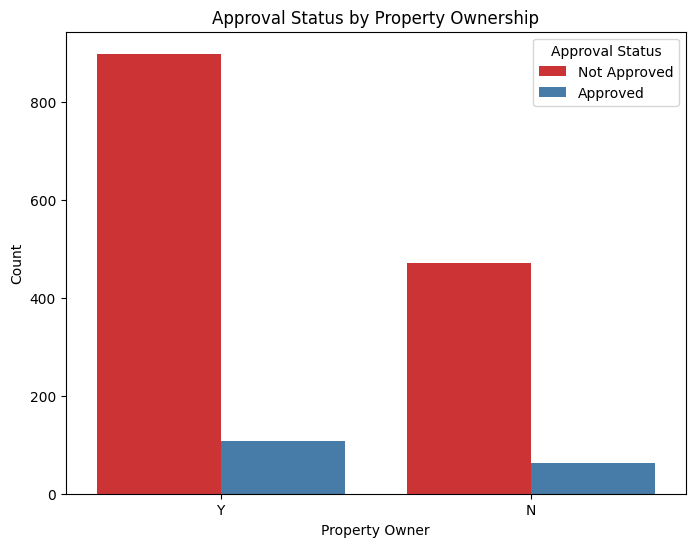

In [ ]:
# Visualizing relationship between Property Owners and Approval Status
property_approval = pd.crosstab(credit['property_owner'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Property Owner and approval Status:")
print(property_approval)
print("-------------------------------\n")
plt.figure(figsize=(8, 6))
sns.countplot(x='property_owner', hue='approval_status', data=credit, palette='Set1')
plt.title('Approval Status by Property Ownership')
plt.xlabel('Property Owner')
plt.ylabel('Count')
plt.legend(title='Approval Status', labels=['Not Approved', 'Approved'])
plt.show()

In contrast, property ownership emerges as a more influential factor in credit card approval decisions. Applicants who own property are notably more likely to secure approval for a credit card. This suggests that property ownership plays a more substantial role in the credit card approval process compared to vehicle ownership.

-------------------------------
Income Type and approval Status:
approval_status          0    1   All
type_income                          
Commercial associate   314   50   364
Pensioner              227   40   267
State servant          110    5   115
Working                720   75   795
All                   1371  170  1541
-------------------------------



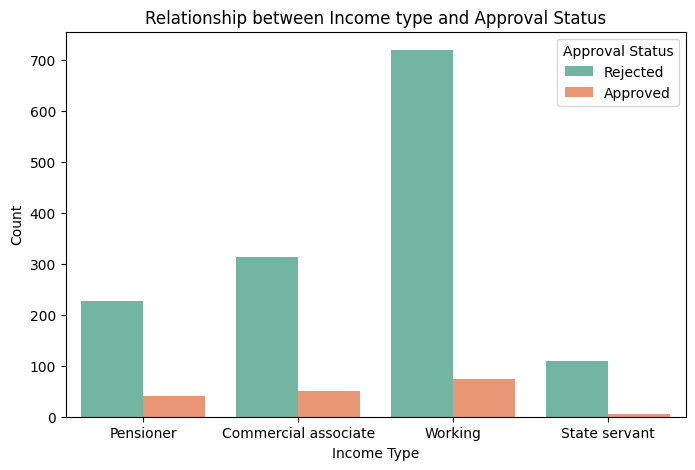

In [ ]:
# Visualizing Relationship between Income Type and Approval Status
income_approval = pd.crosstab(credit['type_income'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Income Type and approval Status:")
print(income_approval)
print("-------------------------------\n")
plt.figure(figsize=(8,5))
sns.countplot(data=credit, x='type_income',  hue='approval_status', palette='Set2')
plt.title("Relationship between Income type and Approval Status")
plt.xlabel("Income Type")
plt.ylabel("Count")
plt.legend(title='Approval Status', labels=['Rejected', 'Approved'])
plt.xticks(rotation=0)
plt.show()

The data reveals a link between income type and employment status, with "working," "commercial associate," and "state servant" applicants typically classified as employed. In contrast, "pensioner" applicants are often categorized as unemployed, indicating a correlation between income type and employment status.

-------------------------------
Education and approval Status:
approval_status         0    1   All
education                           
Academic degree         2    0     2
Higher education      369   52   421
Incomplete higher      63    5    68
Lower secondary        15    6    21
Secondary education   922  107  1029
All                  1371  170  1541
-------------------------------



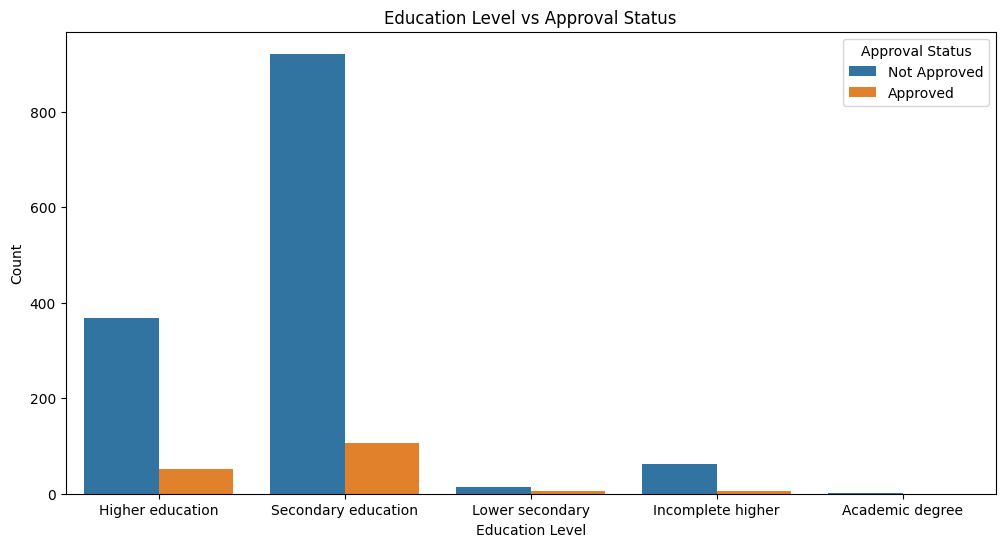

In [ ]:
# Relationship between Education Level and Approval Status
education_approval = pd.crosstab(credit['education'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Education and approval Status:")
print(education_approval)
print("-------------------------------\n")
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='approval_status', data=credit)
plt.title('Education Level vs Approval Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Approval Status', labels=['Not Approved', 'Approved'])
plt.show()

The data suggests that the education qualification of applicants does not notably impact credit card approval, with most approvals going to those with secondary education. Applicants with a degree, surprisingly, have the lowest approval rates, indicating that education level may not be a significant factor in credit card approval decisions.

-------------------------------
Housing type and approval Status:
approval_status         0    1   All
housing_type                        
Co-op apartment         3    2     5
House / apartment    1233  141  1374
Municipal apartment    37   16    53
Office apartment        7    2     9
Rented apartment       17    4    21
With parents           74    5    79
All                  1371  170  1541
-------------------------------



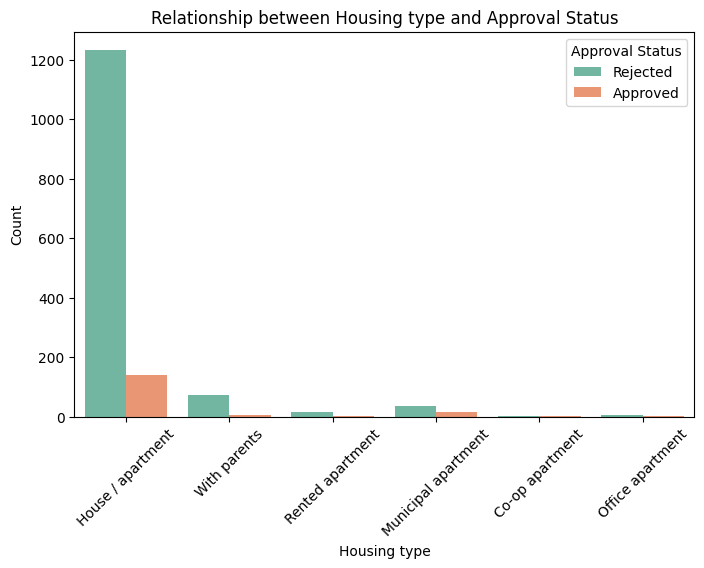

In [ ]:
# Relationship between Housing Type and Approval Status
housing_approval = pd.crosstab(credit['housing_type'], credit['approval_status'], margins=True)
print("-------------------------------")
print("Housing type and approval Status:")
print(housing_approval)
print("-------------------------------\n")
plt.figure(figsize=(8,5))
sns.countplot(data=credit, x='housing_type',  hue='approval_status', palette='Set2')
plt.title("Relationship between Housing type and Approval Status")
plt.xlabel("Housing type")
plt.ylabel("Count")
plt.legend(title='Approval Status', labels=['Rejected', 'Approved'])
plt.xticks(rotation=45)
plt.show()

As observed previously with property ownership, a significant number of applicants possess a house or apartment as a form of property. This reiterates the notion that individuals who own property are more likely to receive credit card approvals.

## **Encoding**

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   id               1541 non-null   int64   
 1   gender           1541 non-null   object  
 2   car_owner        1541 non-null   object  
 3   property_owner   1541 non-null   object  
 4   children         1541 non-null   int64   
 5   annual_income    1541 non-null   int64   
 6   type_income      1541 non-null   object  
 7   education        1541 non-null   object  
 8   marital_status   1541 non-null   object  
 9   housing_type     1541 non-null   object  
 10  age              1541 non-null   category
 11  employed_status  1541 non-null   object  
 12  family_size      1541 non-null   int64   
 13  approval_status  1541 non-null   int64   
dtypes: category(1), int64(5), object(8)
memory usage: 202.6+ KB


On Independent Variables

In [ ]:
X = credit.iloc[:, :-1]

In [ ]:
X.drop(columns=['id','type_income'], inplace=True, axis=1) # These variables are not necessary

In [ ]:
categorical_columns = [0, 1, 2, 5, 6, 7, 8, 9]
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')
X = ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, ..., 0.00e+00, 1.80e+05, 2.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 3.15e+05, 2.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 3.15e+05, 2.00e+00],
       ...,
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 2.00e+00, 1.80e+05, 4.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 0.00e+00, 2.70e+05, 2.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 2.25e+05, 2.00e+00]])

On Dependent Variable

In [ ]:
y = credit.iloc[:,-1]
y

0       1
1       1
2       1
3       1
4       1
       ..
1543    0
1544    0
1545    0
1546    0
1547    0
Name: approval_status, Length: 1541, dtype: int64

### **Treating Imbalance in dataset**

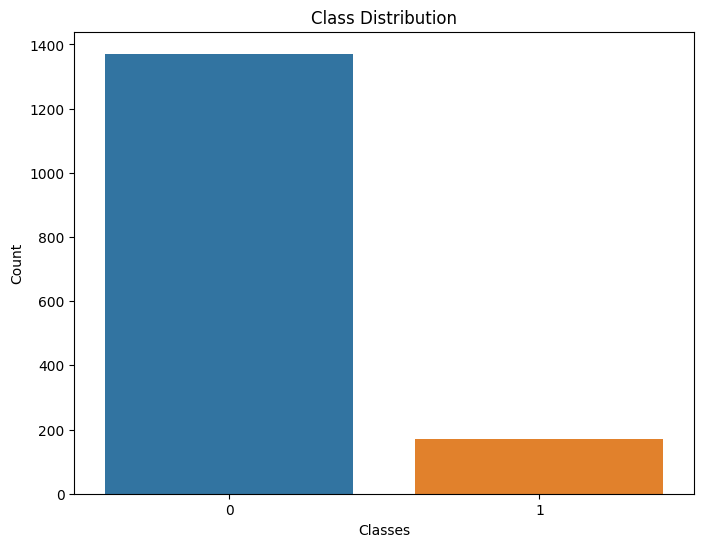

0    1371
1     170
Name: approval_status, dtype: int64


In [ ]:
# Count the occurrences of each class
class_distribution = y.value_counts()
# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()
print(class_distribution)

As we have less data i would be going with over sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X, y = oversampler.fit_resample(X, y)

### **Splitting Train & Test Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(2193, 31)
(549, 31)


In [ ]:
cc_train = X_train.copy()
cc_train

array([[0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 2.9250e+05,
        2.0000e+00],
       [1.0000e+00, 0.0000e+00, 1.0000e+00, ..., 0.0000e+00, 1.3500e+05,
        1.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.8000e+05,
        3.0000e+00],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.8000e+05,
        2.0000e+00],
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.0000e+00, 3.8025e+05,
        3.0000e+00],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 1.0000e+00, 3.8025e+05,
        3.0000e+00]])

In [ ]:
cc_test = X_test.copy()
cc_test

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 9.000e+04,
        2.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.710e+05,
        3.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.000e+00, 2.250e+05,
        4.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 9.450e+04,
        2.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.125e+05,
        2.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 3.150e+05,
        2.000e+00]])

### **Standerdizating X Train & Y Test**


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train[:,:] = sc.fit_transform(X_train[:,:])

X_test[:,:] = sc.transform(X_test[:,:])

In [ ]:
X_train

array([[-1.21802246,  1.21802246, -1.24498996, ..., -0.59081669,
         1.25425745, -0.1160305 ],
       [ 0.82100292, -0.82100292,  0.80321933, ..., -0.59081669,
        -0.59758538, -1.30507199],
       [-1.21802246,  1.21802246, -1.24498996, ...,  0.96834215,
        -0.06848743,  1.073011  ],
       ...,
       [ 0.82100292, -0.82100292, -1.24498996, ...,  0.96834215,
        -0.06848743, -0.1160305 ],
       [-1.21802246,  1.21802246,  0.80321933, ...,  0.96834215,
         2.28599846,  1.073011  ],
       [-1.21802246,  1.21802246, -1.24498996, ...,  0.96834215,
         2.28599846,  1.073011  ]])

In [ ]:
X_test

array([[ 0.82100292, -0.82100292, -1.24498996, ..., -0.59081669,
        -1.12668333, -0.1160305 ],
       [ 0.82100292, -0.82100292, -1.24498996, ...,  0.96834215,
        -0.17430702,  1.073011  ],
       [-1.21802246,  1.21802246, -1.24498996, ...,  2.52750099,
         0.46061052,  2.26205249],
       ...,
       [ 0.82100292, -0.82100292,  0.80321933, ..., -0.59081669,
        -1.07377354, -0.1160305 ],
       [ 0.82100292, -0.82100292, -1.24498996, ..., -0.59081669,
        -0.86213436, -0.1160305 ],
       [ 0.82100292, -0.82100292, -1.24498996, ..., -0.59081669,
         1.51880643, -0.1160305 ]])

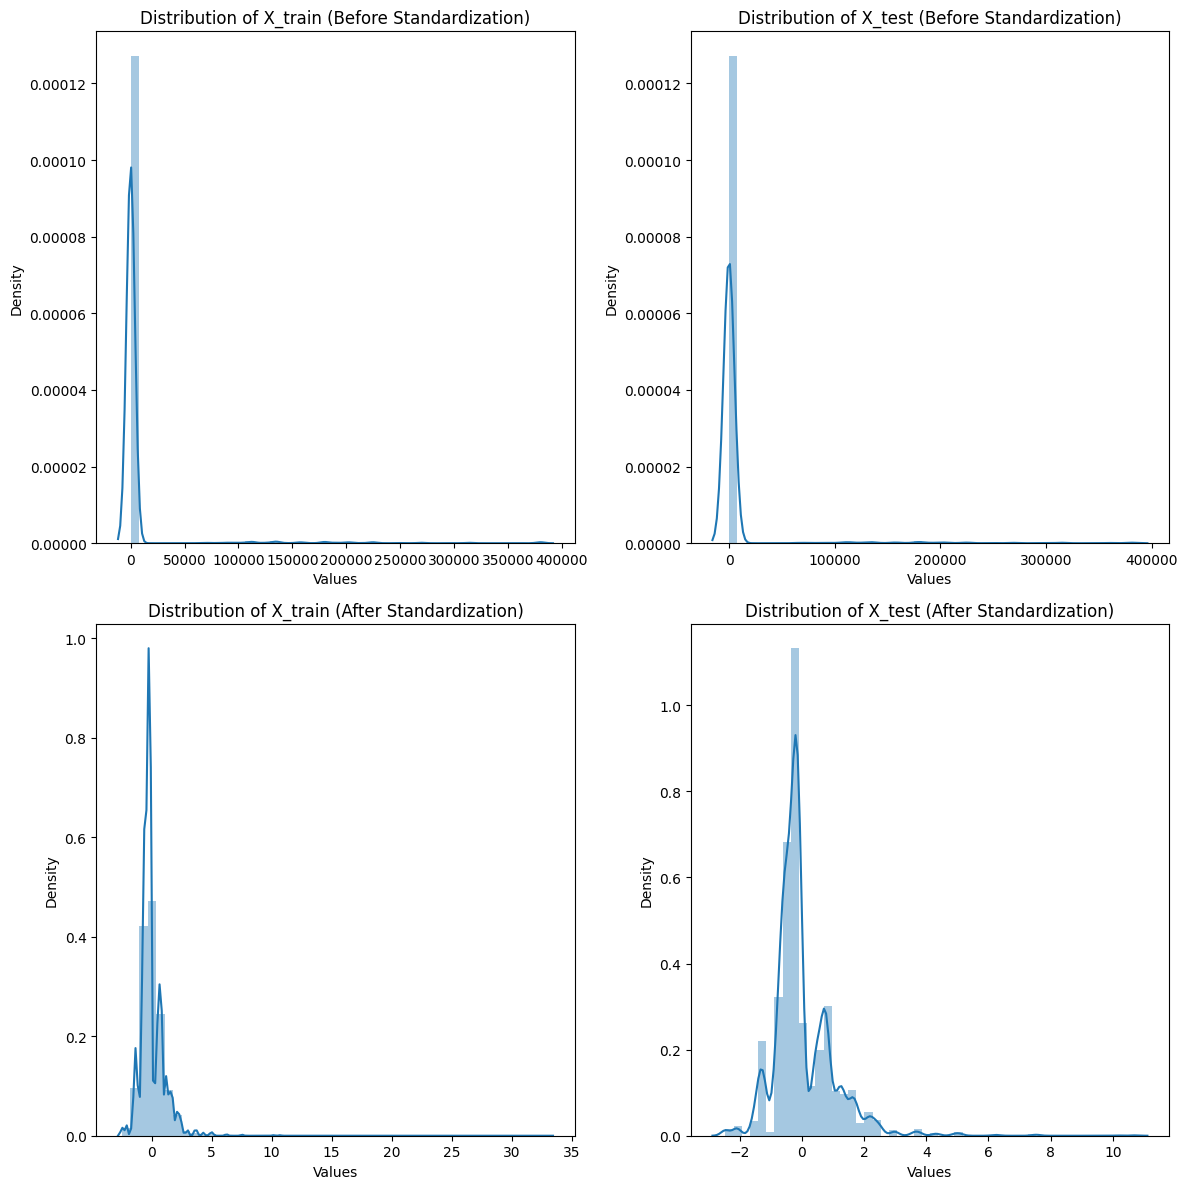

In [ ]:
# Create a figure with two rows and two columns
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Before Standardization: Plot the distribution of X_train
sns.distplot(cc_train, kde=True, ax=axes[0, 0])
axes[0, 0].set_xlabel('Values')
axes[0, 0].set_ylabel('Density')
axes[0, 0].set_title('Distribution of X_train (Before Standardization)')

# Before Standardization: Plot the distribution of X_test
sns.distplot(cc_test, kde=True, ax=axes[0, 1])
axes[0, 1].set_xlabel('Values')
axes[0, 1].set_ylabel('Density')
axes[0, 1].set_title('Distribution of X_test (Before Standardization)')

# After Standardization: Plot the distribution of X_train
sns.distplot(X_train, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Values')
axes[1, 0].set_ylabel('Density')
axes[1, 0].set_title('Distribution of X_train (After Standardization)')

# After Standardization: Plot the distribution of X_test
sns.distplot(X_test, kde=True, ax=axes[1, 1])
axes[1, 1].set_xlabel('Values')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Distribution of X_test (After Standardization)')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


There is a significant contrast between the data before and after standardization.


# **Machine Learning Algorithms**

### **Logistic Regression**

In [ ]:
# Create a Logistic Regression model
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print(f'Accuracy Score : {accuracy}')

class_report = classification_report(y_test, y_pred)
print(f'Classification Report :\n {class_report}')

Accuracy Score : 60.29
Classification Report :
               precision    recall  f1-score   support

           0       0.60      0.62      0.61       277
           1       0.60      0.58      0.59       272

    accuracy                           0.60       549
   macro avg       0.60      0.60      0.60       549
weighted avg       0.60      0.60      0.60       549



In [ ]:
# Define the hyperparameter grid to search for logistic regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga']}

grid_search_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_lr.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_params_lr = grid_search_lr.best_params_
best_model_lr = grid_search_lr.best_estimator_
print(best_params_lr)
print(best_model_lr)

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=10, solver='liblinear')


In [ ]:
lr_mod_best = LogisticRegression(C=10, penalty='l2', solver='liblinear')
lr_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_lr = lr_mod_best.predict(X_test)
class_report_lr_best = classification_report(y_test, y_pred_best_lr)
print(f'Classification Report :\n {class_report_lr_best}')

Classification Report :
               precision    recall  f1-score   support

           0       0.60      0.62      0.61       277
           1       0.60      0.58      0.59       272

    accuracy                           0.60       549
   macro avg       0.60      0.60      0.60       549
weighted avg       0.60      0.60      0.60       549



In [ ]:
lrmodel_accuracy = round(accuracy_score(y_test, y_pred_best_lr)*100, 2)
print(f'Accuracy Score after tuning : {lrmodel_accuracy}')

Accuracy Score after tuning : 60.29


Logistic Regression model we can predict 60.29% accurately, and remains the same after hyperparameter tuning.

### **DecisionTree Model**

In [ ]:
# Create a DecisionTree Model
dt = DecisionTreeClassifier()

# Train the model on the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print(f'Accuracy Score : {accuracy}')

class_report = classification_report(y_test, y_pred)
print(f'Classification Report :\n {class_report}')

Accuracy Score : 93.99
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.88      0.94       277
           1       0.89      1.00      0.94       272

    accuracy                           0.94       549
   macro avg       0.95      0.94      0.94       549
weighted avg       0.95      0.94      0.94       549



In [ ]:
# Define the hyperparameter grid to search for decision tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']}

# Create the GridSearchCV object
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='f1', n_jobs=-1)

grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_
print(best_params_dt)
print(best_model_dt)

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(criterion='entropy', max_depth=30)


In [ ]:
dt_mod_best = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 1, min_samples_split = 2)
dt_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_dt = dt_mod_best.predict(X_test)
class_report_dt_best = classification_report(y_test, y_pred_best_dt)
print(f'Classification Report :\n {class_report_dt_best}')

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.89      0.94       277
           1       0.90      1.00      0.94       272

    accuracy                           0.94       549
   macro avg       0.95      0.94      0.94       549
weighted avg       0.95      0.94      0.94       549



In [ ]:
dtmodel_accuracy = round(accuracy_score(y_test, y_pred_best_dt)*100, 2)
print(f'Accuracy Score after tuning : {dtmodel_accuracy}')

Accuracy Score after tuning : 94.17


Decision Tree model we can predict 93.99% accurately, after tuning we are getting 94.17% aacuracy

##**Random Forest Model**

In [ ]:
# Create a Logistic Random Forest
rf = RandomForestClassifier(random_state = 42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print(f'Accuracy Score: {accuracy}')

class_report = classification_report(y_test, y_pred)
print(f'Classification Report :\n {class_report}')

Accuracy Score: 94.72
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.90      0.94       277
           1       0.91      1.00      0.95       272

    accuracy                           0.95       549
   macro avg       0.95      0.95      0.95       549
weighted avg       0.95      0.95      0.95       549



In [ ]:
# Define the hyperparameter grid to search for random forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_
print(best_params_rf)
print(best_model_rf)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestClassifier(n_estimators=200, random_state=42)


In [ ]:
rf_mod_best = RandomForestClassifier(criterion = 'gini', min_samples_leaf = 1, min_samples_split=2, n_estimators=100, random_state=42)
rf_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_rf = rf_mod_best.predict(X_test)
class_report_rf_best = classification_report(y_test, y_pred_best_rf)
print(f'Classification Report :\n {class_report_rf_best}')

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.90      0.94       277
           1       0.91      1.00      0.95       272

    accuracy                           0.95       549
   macro avg       0.95      0.95      0.95       549
weighted avg       0.95      0.95      0.95       549



In [ ]:
rfmodel_accuracy = round(accuracy_score(y_test, y_pred_best_rf)*100, 2)
print(f'Accuracy Score after tuning : {rfmodel_accuracy}')

Accuracy Score after tuning : 94.72


Random Forest model we can predict 94.72% accurately, after tuning we are getting better aacuracy

### **Support Vector Machine (SVM)**

In [ ]:
# Create a Support Vector Machine (SVM)
svm = SVC()

# Train the model on the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred)*100,2)
print(f'Accuracy Score: {accuracy}')

class_report = classification_report(y_test, y_pred)
print(f'Classification Report :\n {class_report}')

Accuracy Score: 80.87
Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.71      0.79       277
           1       0.75      0.91      0.83       272

    accuracy                           0.81       549
   macro avg       0.82      0.81      0.81       549
weighted avg       0.82      0.81      0.81       549



In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]}

# Create the GridSearchCV object
grid_search_svc = GridSearchCV(svm, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search_svc.fit(X_train, y_train)

best_params_svc = grid_search_svc.best_params_
best_model_svc= SVC(**best_params_svc)
print(best_model_svc)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
SVC(C=10, gamma=1)


In [ ]:
svc_mod_best = SVC(C=10, gamma=1)
svc_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_svc = svc_mod_best.predict(X_test)
class_report_svc_best = classification_report(y_test, y_pred_best_svc)
print(f'Classification Report :\n {class_report_svc_best}')

Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.88      0.94       277
           1       0.89      1.00      0.94       272

    accuracy                           0.94       549
   macro avg       0.95      0.94      0.94       549
weighted avg       0.95      0.94      0.94       549



In [ ]:
svcmodel_accuracy = round(accuracy_score(y_test, y_pred_best_svc)*100, 2)
print(f'Accuracy Score after tuning : {svcmodel_accuracy}')

Accuracy Score after tuning : 93.99


Support Vector Machine (SVM) model can predict 80.87% accurately, but after tuning we are gettig the accuracy of 93.99%

# **Model Comparison**

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
accuracy_scores = [lrmodel_accuracy, dtmodel_accuracy, rfmodel_accuracy, svcmodel_accuracy]

trace = go.Bar(
    x=models,
    y=accuracy_scores,
    text=[f'{score}%' for score in accuracy_scores],
    marker=dict(color='lightblue', line=dict(color='black', width=1.5)),
)

data = [trace]

layout = go.Layout(
    title='Comparison of Model Performance Metrics',
    xaxis=dict(title='Models'),
    yaxis=dict(title='Scores'),
)

fig = go.Figure(data=data, layout=layout)


pyo.iplot(fig)

#Model comparison DataFrame
accuracy_scores_with_percent = [f'{score}%' for score in accuracy_scores]
model_comparison_df = pd.DataFrame({'Model_Name': models, 'Accuracy Score': accuracy_scores_with_percent})
model_comparison_df = model_comparison_df.sort_values(by='Accuracy Score', ascending=False)
model_comparison_df.reset_index(drop=True, inplace=True)
print(model_comparison_df)

            Model_Name Accuracy Score
0        Random Forest         94.72%
1        Decision Tree         94.17%
2                  SVM         93.99%
3  Logistic Regression         60.29%


# **Conclusion:**

---


Based on the performance metrics of the four models (Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine) and considering the goal of maximizing the accuracy of credit card approval prediction, the **Random Forest model** emerges as the most suitable choice:

Accuracy Score: The Random Forest model achieved the highest accuracy score among the models, with a value of 0.95. This indicates that it correctly predicted credit card approvals in 95% of cases.

Precision Score: For predicting approved cases (1), the Random Forest model achieved a precision score of 0.91, signifying that when it predicted an approval, it was highly reliable. For predicting non-approved cases (0), it achieved a precision score of 1.00 , indicating a great level of accuracy.

Recall Score: The Random Forest model demonstrated excellent recall for approved cases (1) with a score of 1.00, implying that it effectively captured nearly all actual credit card approvals. While its recall for non-approved cases (0) was lower at 0.90.

F1 Score: The F1 Score, which combines precision and recall, was high for predicting approved cases (1), with a value of 0.95, indicating a good balance between precision and recall. For non-approved cases (0), the F1 Score was 0.94, reflecting a trade-off between precision and recall, as expected.

In conclusion, the Random Forest model demonstrates the best overall performance in terms of accuracy and precision while maintaining a reasonable balance between precision and recall for both approval and non-approval predictions. Therefore, it is the recommended choice for credit card approval prediction based on the provided data and evaluation metrics.